# Raymond Toth Final Project

In [1]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge  # Linear Regression + L2 regularization
from sklearn.linear_model import Lasso  # Linear Regression + L1 regularization
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae

#import xgboost
#import os
#mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
#os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
#from xgboost import XGBRegressor
#from xgboost import plot_importance  # to plot feature importance

# to save the final model on disk
from sklearn.externals import joblib

In [2]:
np.set_printoptions(precision=2, suppress=True) #for printing floating point numbers upto  precision 2

# Load Black Friday data from csv file 

In [3]:
df = pd.read_csv('BlackFriday 2.csv')

In [4]:
df.shape

(537577, 12)

# List columns

In [5]:
list(df)

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [6]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

# Display head(5) to see example observations

In [7]:
pd.set_option('display.max_columns', 20) # sets display max to two columns

In [8]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Since some features are numeric and some are nominal, the nominal data must be filtered

In [9]:
df.dtypes[df.dtypes == 'object']

Product_ID                    object
Gender                        object
Age                           object
City_Category                 object
Stay_In_Current_City_Years    object
dtype: object

# Distribution of numerical features

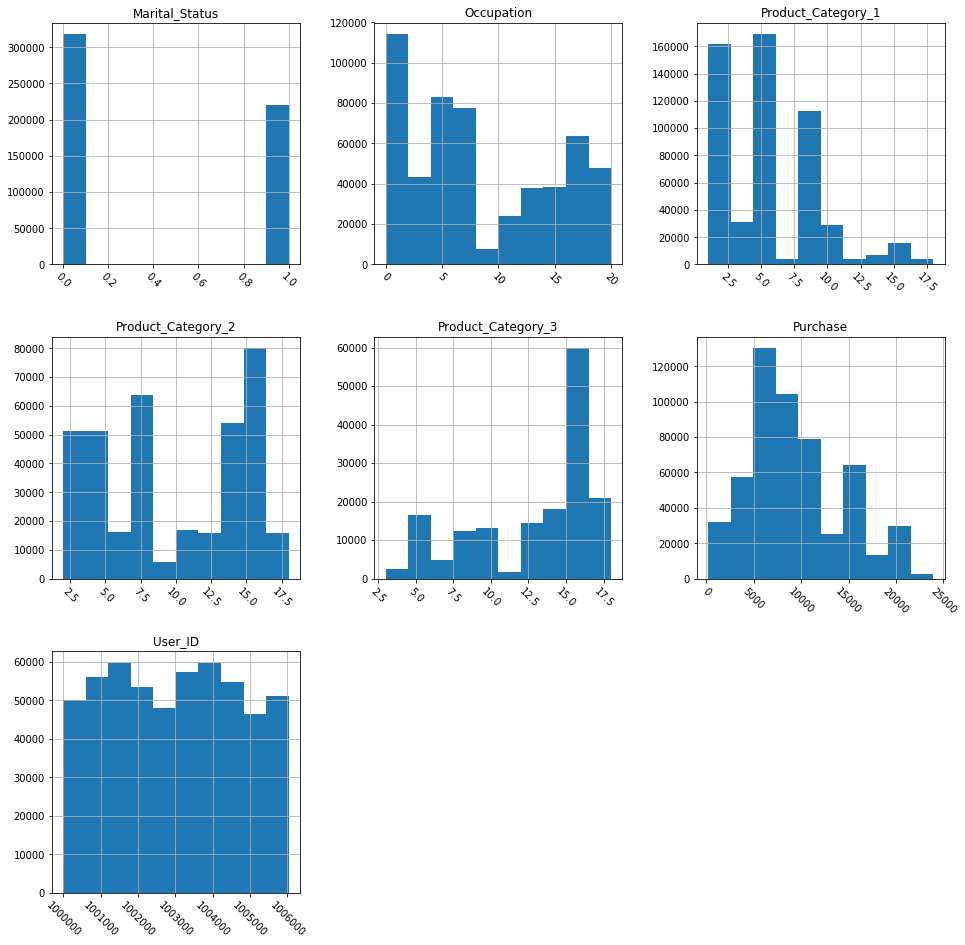

In [10]:
# PLotting histogram
df.hist(figsize=(16,16), xrot=-45) ## sets figure size to 16 by 16 and rotates x axis labels by 45 degrees


plt.show()

# Observations about the Histograms
There are more single individuals than married ones

# Display Stats about the numerical features

In [11]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


# Observations about numerical stats:

# Distribution of nominal features

In [12]:
# displaying summary stats for nominal data
df.describe(include = ['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577,537577
unique,3623,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1858,405380,214690,226493,189192


# observations:

# Bar plots for categorical features

# Bar plot for 'Gender'

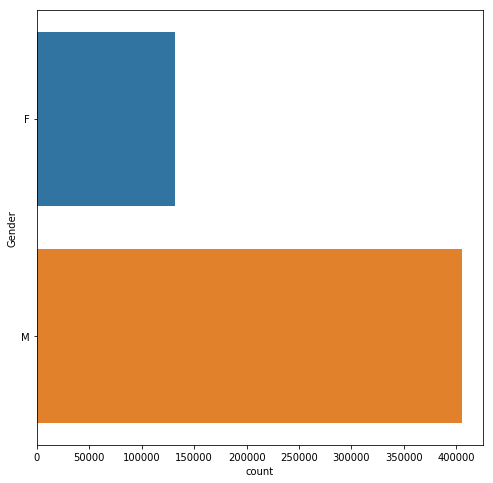

In [13]:
plt.figure(figsize = (8,8))
sns.countplot(y = 'Gender', data = df)

# Observations:
Majority of shoppers are male; 400,000+ male and only about 120,000 female

# Bar plot for 'Age'

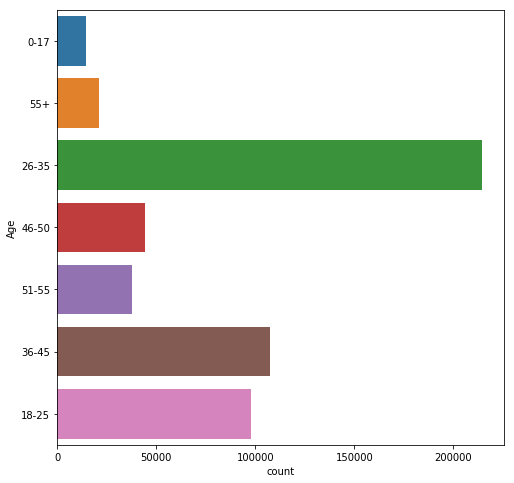

In [14]:
plt.figure(figsize = (8,8))
sns.countplot(y = 'Age', data = df)

# Observation:
Most shoppers between the age of 26-35

# Bar plot for 'City_Category'

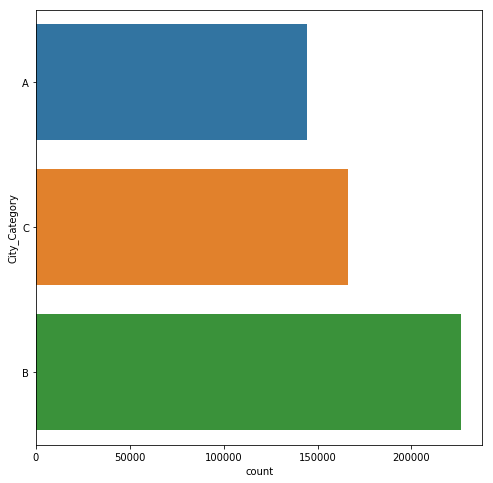

In [15]:
plt.figure(figsize = (8,8))
sns.countplot(y = 'City_Category', data = df)

# Bar plot for 'Stay_In_Current_City_Years'

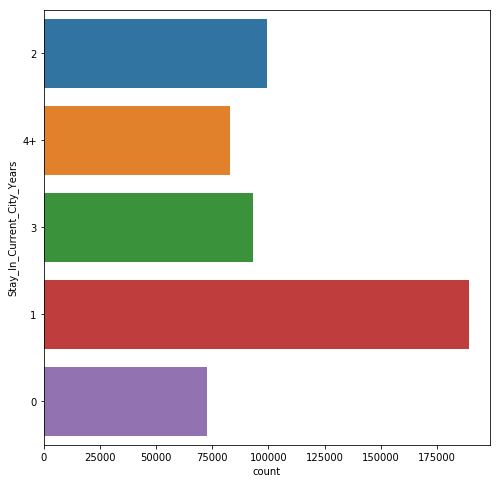

In [16]:
plt.figure(figsize = (8,8))
sns.countplot(y = 'Stay_In_Current_City_Years', data = df)

# Observation:
Majority of the shoppers have only been staying in the city for one year, while the the count is about the same for the rest

# Segmentations
cutting the data to observe the relationship between nominal and numeric data

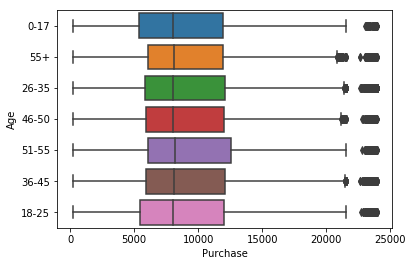

In [17]:
sns.boxplot(y='Age', x='Purchase', data=df)

# Observation:
on average individuals made the same amount of purchases regardless of age except for some outliers

In [18]:
# comparing genders across other features
df.groupby('Gender').mean()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,,,,,,,
F,1.003088e+06,6.742672,0.417733,5.595445,10.007969,12.452318,8809.761349
M,1.002961e+06,8.519705,0.405883,5.197748,9.789072,12.732924,9504.771713


# Observation:
Males make more purchases than females

In [19]:
# comparing marital status across other features
df.groupby('Marital_Status').mean()

,User_ID,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Marital_Status,,,,,,
0,1.002965e+06,7.948760,5.231467,9.778636,12.604030,9333.325467
1,1.003030e+06,8.276429,5.388219,9.935261,12.767646,9334.632681


# Observation: 
Individuals make the same amount of purchases regardless of marital status

# Segmenting by property_type and displaying the means and standard deviations within each class

In [20]:
df.groupby('Gender').agg([np.mean, np.std])

User_ID              Occupation           Marital_Status  \
                mean          std       mean       std           mean   
Gender                                                                  
F       1.003088e+06  1774.236455   6.742672  6.242116       0.417733   
M       1.002961e+06  1693.251916   8.519705  6.554518       0.405883   

                 Product_Category_1           Product_Category_2            \
             std               mean       std               mean       std   
Gender                                                                       
F       0.493188           5.595445  3.476495          10.007969  4.872295   
M       0.491063           5.197748  3.830816           9.789072  5.153046   

       Product_Category_3               Purchase               
                     mean       std         mean          std  
Gender                                                         
F               12.452318  4.126782  8809.761349  4721.440055  
M               12.732924  4.121502  9504.771713  5051.057256

# Correlations

In [21]:
# Finally, let's take a look at the relationships between numeric features and other numeric features.
# Correlation is a value between -1 and 1 that represents how closely values for two separate features.
# Positive correlation means that as one feature increases, the other increases.
# Negative correlation means that as one feature increases, the other decreases.
# Correlations near -1 or 1 indicate a strong relationship.
# Those closer to 0 indicate a weak relationship.
# 0 indicates no relationship.

In [22]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.001471,0.004045,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,0.001471,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.004045,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.005389,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000


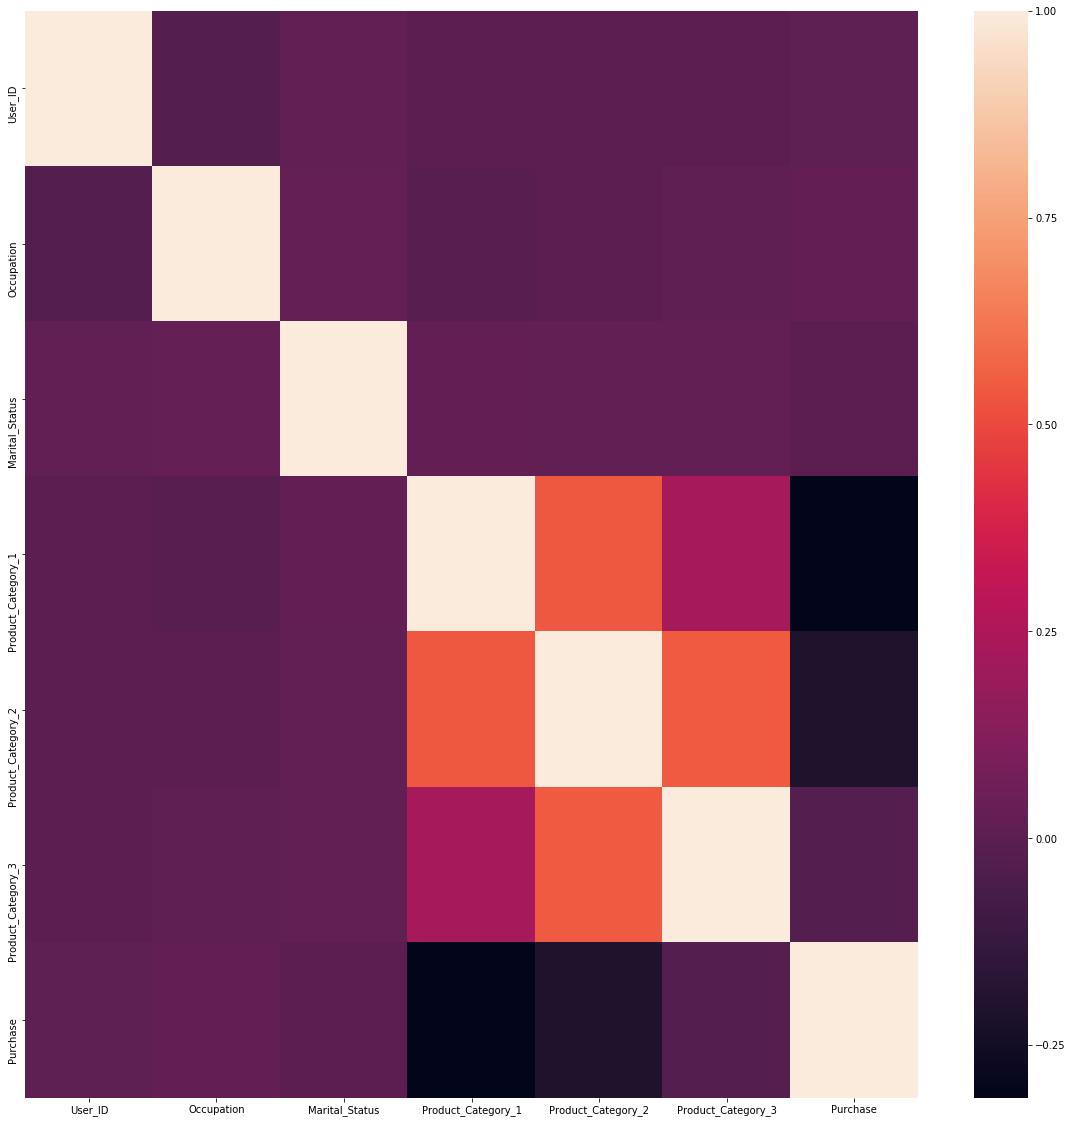

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

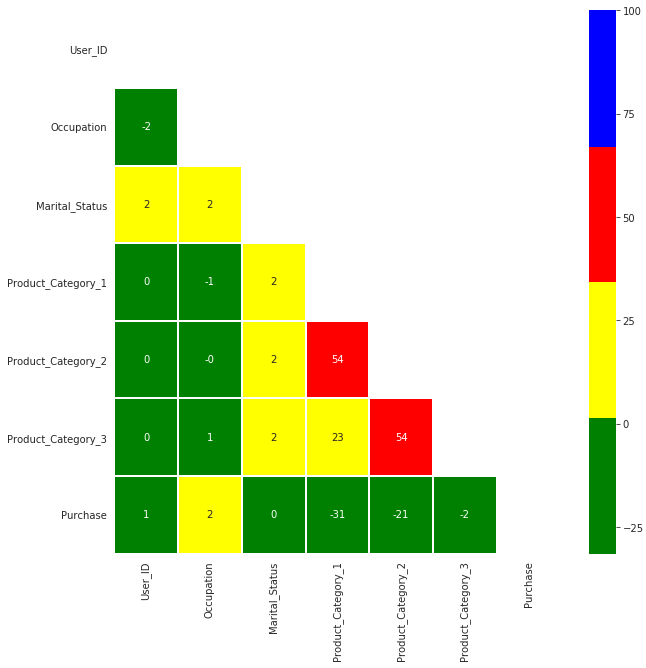

In [24]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

# Data Cleaning

In [25]:
# Dropping the duplicates (De-duplication)

In [26]:
df = df.drop_duplicates()
print( df.shape )

(537577, 12)


In [27]:
# It looks like we didn't have any duplicates in our original dataset. 
# Even so, it's a good idea to check this as an easy first step for cleaning your dataset

In [28]:
# Display number of missing values by numeric feature
df.select_dtypes(exclude=['object']).isnull().sum()

User_ID                    0
Occupation                 0
Marital_Status             0
Product_Category_1         0
Product_Category_2    166986
Product_Category_3    373299
Purchase                   0
dtype: int64

In [29]:
# Product_Category_2 and Product_Category_3 have a lot of missing values

In [30]:
# replacing missing values with a value of 0
df['Product_Category_2'] = df['Product_Category_2'].fillna(0)
df['Product_Category_3'] = df['Product_Category_3'].fillna(0)
df.select_dtypes(exclude=['object']).isnull().sum()

User_ID               0
Occupation            0
Marital_Status        0
Product_Category_1    0
Product_Category_2    0
Product_Category_3    0
Purchase              0
dtype: int64

In [31]:
# Display number of missing values by categorical feature
df.select_dtypes(include=['object']).isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
City_Category                 0
Stay_In_Current_City_Years    0
dtype: int64

In [32]:
df = df.drop(['Product_ID', 'User_ID'], axis=1) # dropping because they may cause problems in the models 

In [33]:
# no missing data in nominal data

# Checking for outliers as they may cause problems with certain models 
# Here we are using box plots

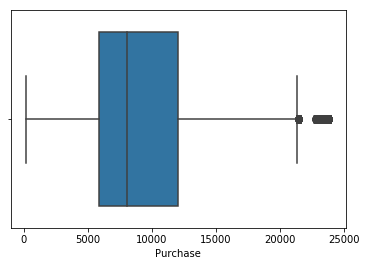

In [34]:
sns.boxplot(df.Purchase)

In [35]:
# purchase includes a few outliers that may affect our models, let's handle some of them

In [36]:
df = df[df.Purchase <= 22500]

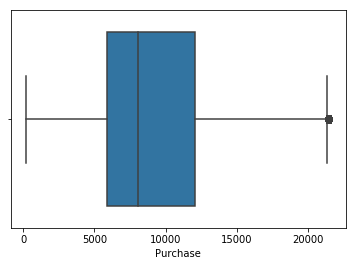

In [37]:
sns.boxplot(df.Purchase)

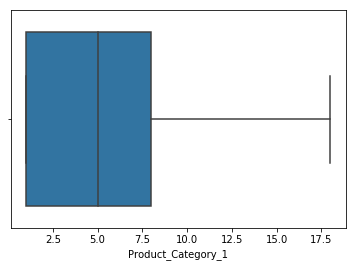

In [38]:
sns.boxplot(df.Product_Category_1)

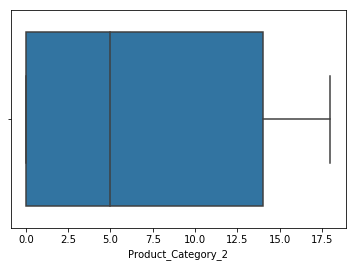

In [39]:
sns.boxplot(df.Product_Category_2)

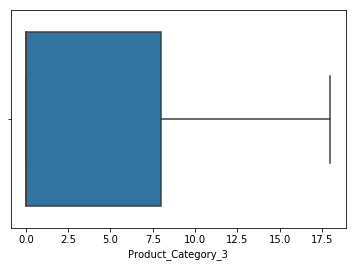

In [40]:
sns.boxplot(df.Product_Category_3)

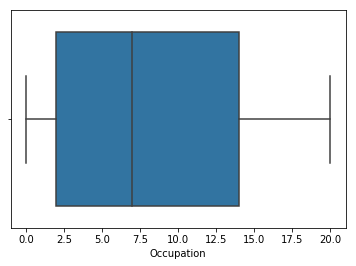

In [41]:
sns.boxplot(df.Occupation)

In [42]:
# Removing marital status because as seen earlier, 
# individuals had on average the same value of Purchase regardless of marital status

In [43]:
df = df.drop(['Marital_Status'], axis=1)

# Saving the new data frame so cleaning won't have to be re-done after classing

In [44]:
df.to_csv(r'C:\Users\Mondy\Desktop\cleandf.csv', index=False)

# Encoding the dummy variables AKA one hot encoding

In [45]:
# Since machine learning algorithms cannot directly handle nominal features, especially text values, we must create dummy 
# variables for our categorical features.
# Dummy variables can either be 0 or 1 (binary) features that represent a single class from a categorical feature.

In [46]:
# Let's create a new data frame with dummy variables for each of our categorical features 
df = pd.get_dummies(df, columns=['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'])

In [47]:
df.head()

,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,3,0.0,0.0,8370,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,10,1,6.0,14.0,15200,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,10,12,0.0,0.0,1422,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,10,12,14.0,0.0,1057,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,16,8,0.0,0.0,7969,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1


# Data Prep

In [48]:
# Save analytical base table
df.to_csv(r'C:\Users\Mondy\Desktop\analyticaldf.csv', index=None)

In [49]:
df = pd.read_csv('analyticaldf.csv')

# train and test split

In [50]:
# separating the dataframe into different objects for the target variable y (Purchase)
# and the input features x and performing the train and test split

In [51]:
y = df.Purchase # object for target
X = df.drop('Purchase', axis = 1) # creating an object of all features except the target as the input features

In [52]:
# split the x and y into train and test sets as an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [53]:
# confirming that the observations were split accordingly

In [54]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(428208, 21) (107053, 21) (428208,) (107053,)


# Data Standardization

In [55]:
# During data standardization, we perform zero mean centering and unit scaling,
# this means we make the mean of all features 0 and the standard deviation 1.
# We use mean and standard deviation of each feature
# It is important that the mean and standard deviation of each of the features from the training set
# are saved because we use the same mean and standard deviation from the test set

In [56]:

train_mean = X_train.mean()
train_std = X_train.std()

In [57]:
# Standardizing the train data set
X_train = (X_train - train_mean) / train_std

In [58]:
# check for the mean and standard deviation

In [59]:
X_train.describe()

,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
count,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,...,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05
mean,-7.967413e-16,1.342276e-15,2.215706e-15,-4.581080e-16,-2.844475e-15,2.835843e-15,8.903367e-16,-1.680742e-15,-5.151971e-16,-4.681691e-15,...,-4.006444e-15,-3.924250e-16,-3.031625e-15,1.496928e-15,2.961750e-15,-1.301871e-14,-7.956426e-15,1.745917e-15,-2.089756e-15,-1.725055e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.238686e+00,-1.140341e+00,-1.089253e+00,-6.178614e-01,-5.714493e-01,-1.749932e+00,-1.682275e-01,-4.710154e-01,-8.163002e-01,-4.990301e-01,...,-2.742403e-01,-2.008725e-01,-6.067321e-01,-8.531528e-01,-6.697690e-01,-3.953516e-01,-7.373090e-01,-4.768681e-01,-4.584469e-01,-4.261708e-01
25%,-9.320863e-01,-1.140341e+00,-1.089253e+00,-6.178614e-01,-5.714493e-01,5.714493e-01,-1.682275e-01,-4.710154e-01,-8.163002e-01,-4.990301e-01,...,-2.742403e-01,-2.008725e-01,-6.067321e-01,-8.531528e-01,-6.697690e-01,-3.953516e-01,-7.373090e-01,-4.768681e-01,-4.584469e-01,-4.261708e-01
50%,-1.655875e-01,-7.296100e-02,-2.835652e-01,-6.178614e-01,-5.714493e-01,5.714493e-01,-1.682275e-01,-4.710154e-01,-8.163002e-01,-4.990301e-01,...,-2.742403e-01,-2.008725e-01,-6.067321e-01,-8.531528e-01,-6.697690e-01,-3.953516e-01,-7.373090e-01,-4.768681e-01,-4.584469e-01,-4.261708e-01
75%,9.075109e-01,7.275742e-01,1.166673e+00,6.597608e-01,-5.714493e-01,5.714493e-01,-1.682275e-01,-4.710154e-01,1.225037e+00,-4.990301e-01,...,-2.742403e-01,-2.008725e-01,1.648170e+00,1.172120e+00,1.493049e+00,-3.953516e-01,1.356280e+00,-4.768681e-01,-4.584469e-01,-4.261708e-01
max,1.827309e+00,3.396025e+00,1.811223e+00,2.256789e+00,1.749932e+00,5.714493e-01,5.944318e+00,2.123068e+00,1.225037e+00,2.003883e+00,...,3.646429e+00,4.978271e+00,1.648170e+00,1.172120e+00,1.493049e+00,2.529388e+00,1.356280e+00,2.097011e+00,2.181272e+00,2.346471e+00


In [60]:
X_test = (X_test - train_mean) / train_std

In [61]:
# Check for mean and standard deveviation. - not exactly 0 and 1
X_test.describe()

,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
count,107053.000000,107053.000000,107053.000000,107053.000000,107053.000000,107053.000000,107053.000000,107053.000000,107053.000000,107053.000000,...,107053.000000,107053.000000,107053.000000,107053.000000,107053.000000,107053.000000,107053.000000,107053.000000,107053.000000,107053.000000
mean,0.000938,0.002544,-0.001073,0.000888,-0.002060,0.002060,-0.004470,0.004557,-0.003011,0.005630,...,-0.003518,-0.001163,0.000653,0.001903,-0.002658,0.001451,-0.003195,-0.002114,-0.001804,0.007028
std,1.000171,0.998202,0.999268,1.000372,0.998787,0.998787,0.987001,1.003751,0.999383,1.004215,...,0.994047,0.997221,1.000343,1.000305,0.998905,1.001550,0.999009,0.998287,0.998446,1.006704
min,-1.238686,-1.140341,-1.089253,-0.617861,-0.571449,-1.749932,-0.168227,-0.471015,-0.816300,-0.499030,...,-0.274240,-0.200872,-0.606732,-0.853153,-0.669769,-0.395352,-0.737309,-0.476868,-0.458447,-0.426171
25%,-0.932086,-1.140341,-1.089253,-0.617861,-0.571449,0.571449,-0.168227,-0.471015,-0.816300,-0.499030,...,-0.274240,-0.200872,-0.606732,-0.853153,-0.669769,-0.395352,-0.737309,-0.476868,-0.458447,-0.426171
50%,-0.165588,-0.072961,-0.283565,-0.617861,-0.571449,0.571449,-0.168227,-0.471015,-0.816300,-0.499030,...,-0.274240,-0.200872,-0.606732,-0.853153,-0.669769,-0.395352,-0.737309,-0.476868,-0.458447,-0.426171
75%,0.907511,0.727574,1.166673,0.659761,-0.571449,0.571449,-0.168227,-0.471015,1.225037,-0.499030,...,-0.274240,-0.200872,1.648170,1.172120,1.493049,-0.395352,1.356280,-0.476868,-0.458447,-0.426171
max,1.827309,3.396025,1.811223,2.256789,1.749932,0.571449,5.944318,2.123068,1.225037,2.003883,...,3.646429,4.978271,1.648170,1.172120,1.493049,2.529388,1.356280,2.097011,2.181272,2.346471


# Model 1 Baseline Model

In [62]:
# In this model we will predict the avg. of the train labels as the output for each test data point
# This model will be used to perform hypothesis testing to the other more complex models

In [63]:
# Predict Train results
y_train_pred = np.ones(y_train.shape[0])*y_train.mean()

In [64]:
# Predict Test results
y_pred = np.ones(y_test.shape[0])*y_train.mean()
from sklearn.metrics import r2_score

In [65]:
print("Train Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Baseline Model:
*******************************
Root mean squared error:  4905.252588576977
R-squared:  0.0
Mean Absolute Error:  3994.073514580103


In [66]:
print("Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Results for Baseline Model:
*******************************
Root mean squared error:  4898.339094501526
R-squared:  -3.889673724799536e-05
Mean Absolute Error:  3987.018433872469


In [67]:
# Moving on to the next model

# Model 2 Ridge Regression

In [68]:
X_train.describe()

,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
count,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,...,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05,4.282080e+05
mean,-7.967413e-16,1.342276e-15,2.215706e-15,-4.581080e-16,-2.844475e-15,2.835843e-15,8.903367e-16,-1.680742e-15,-5.151971e-16,-4.681691e-15,...,-4.006444e-15,-3.924250e-16,-3.031625e-15,1.496928e-15,2.961750e-15,-1.301871e-14,-7.956426e-15,1.745917e-15,-2.089756e-15,-1.725055e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.238686e+00,-1.140341e+00,-1.089253e+00,-6.178614e-01,-5.714493e-01,-1.749932e+00,-1.682275e-01,-4.710154e-01,-8.163002e-01,-4.990301e-01,...,-2.742403e-01,-2.008725e-01,-6.067321e-01,-8.531528e-01,-6.697690e-01,-3.953516e-01,-7.373090e-01,-4.768681e-01,-4.584469e-01,-4.261708e-01
25%,-9.320863e-01,-1.140341e+00,-1.089253e+00,-6.178614e-01,-5.714493e-01,5.714493e-01,-1.682275e-01,-4.710154e-01,-8.163002e-01,-4.990301e-01,...,-2.742403e-01,-2.008725e-01,-6.067321e-01,-8.531528e-01,-6.697690e-01,-3.953516e-01,-7.373090e-01,-4.768681e-01,-4.584469e-01,-4.261708e-01
50%,-1.655875e-01,-7.296100e-02,-2.835652e-01,-6.178614e-01,-5.714493e-01,5.714493e-01,-1.682275e-01,-4.710154e-01,-8.163002e-01,-4.990301e-01,...,-2.742403e-01,-2.008725e-01,-6.067321e-01,-8.531528e-01,-6.697690e-01,-3.953516e-01,-7.373090e-01,-4.768681e-01,-4.584469e-01,-4.261708e-01
75%,9.075109e-01,7.275742e-01,1.166673e+00,6.597608e-01,-5.714493e-01,5.714493e-01,-1.682275e-01,-4.710154e-01,1.225037e+00,-4.990301e-01,...,-2.742403e-01,-2.008725e-01,1.648170e+00,1.172120e+00,1.493049e+00,-3.953516e-01,1.356280e+00,-4.768681e-01,-4.584469e-01,-4.261708e-01
max,1.827309e+00,3.396025e+00,1.811223e+00,2.256789e+00,1.749932e+00,5.714493e-01,5.944318e+00,2.123068e+00,1.225037e+00,2.003883e+00,...,3.646429e+00,4.978271e+00,1.648170e+00,1.172120e+00,1.493049e+00,2.529388e+00,1.356280e+00,2.097011e+00,2.181272e+00,2.346471e+00


In [69]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [70]:
model.best_estimator_

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [71]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [72]:
## Predict Test results
y_pred = model.predict(X_test)

In [73]:
print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Ridge Regression:
*******************************
Root mean squared error:  4525.174991068817
R-squared:  0.1489638558423183
Mean Absolute Error:  3474.4617265204092


In [74]:
print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Ridge Regression:
*******************************
Root mean squared error:  4525.175467148813
R-squared:  0.14652648764739018
Mean Absolute Error:  3473.6022367850105


# Feature Importance

In [75]:
## Building the model again with the best hyperparameters
model = Ridge(alpha=0.0001)
model.fit(X_train, y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [76]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Product_Category_1
Product_Category_3
City_Category_C
City_Category_A
Gender_M
Gender_F
Age_51-55
Age_0-17
Age_18-25
City_Category_B
Occupation
Age_55+
Age_36-45
Product_Category_2
Stay_In_Current_City_Years_2
Stay_In_Current_City_Years_0
Age_46-50
Stay_In_Current_City_Years_4+
Stay_In_Current_City_Years_3
Stay_In_Current_City_Years_1
Age_26-35


# Model 3 Support Vector Regression

In [77]:
#tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
#model = GridSearchCV(SVR(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
#model.fit(X_train, y_train)
## This takes around 20 minutes

# Model 3 has TerminatedWorkerError, Skipping because I haven't been able to figure out how to get around it

# Model 4 Random Forest Regression

In [78]:
#tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
#model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
#model.fit(X_train, y_train)

In [79]:
# Model 4 has been ongoing for 30 minutes at a time so I am moving on

# Model 6 Lasso Regression

In [80]:
#tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
#model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
#model.fit(X_train, y_train)

In [79]:
#tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
#model = GridSearchCV(Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=20, n_jobs=-1)
#model.fit(X_train, y_train)

KeyboardInterrupt: 

# At this point every model after the first two have been stuck in seemingly endless execution

# Model 7 Decision Tree Regression


In [81]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [82]:
model.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=6,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [83]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [84]:
## Predict Test results
y_pred = model.predict(X_test)

In [85]:
print("Train Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Decision Tree Regression:
*******************************
Root mean squared error:  2970.2473744180934
R-squared:  0.6333408814598084
Mean Absolute Error:  2248.598445831854


In [86]:
print("Test Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Decision Tree Regression:
*******************************
Root mean squared error:  2976.147709982116
R-squared:  0.6308285024053202
Mean Absolute Error:  2251.694150033407


# Model 8 KN Regression

In [87]:
#from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
#neighbors = list(range(1,50,2))
# empty list that will hold cv scores
#cv_scores = []

# perform 10-fold cross validation
#for k in neighbors:
#    knn = KNeighborsRegressor(n_neighbors=k)
#    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
#    cv_scores.append(scores.mean())

# changing to misclassification error
#MSE = [1 - x for x in cv_scores]

# determining best k
#optimal_k = neighbors[MSE.index(min(MSE))]
#print('\nThe optimal number of neighbors is %d.' % optimal_k)

# KN Regression also goes into endless execution

# Comparing the three working models

In [88]:
regComp = df = pd.read_csv('RegressionCompare.csv')

In [90]:
regComp.head()

,Unnamed: 0,RMSE,RSquared,MAE
0,BaseLineModel,4898.3390,-3.8890,3987.0184
1,RidgeRegression,4525.1750,0.1465,3473.6022
2,DecisionTreeRegression,2976.1477,0.6308,2251.6900


# observation:
Out of the three models, the decision tree model looks to be the best model
as its RMSE and MAE values are the lowest and its Rsquared value is closest to 1

# Saving the winning model

In [92]:
win_model = DecisionTreeRegressor(min_samples_split=4, min_samples_leaf=6, max_depth=7)
win_model.fit(X_train, y_train)
with open('rfr_BlackFriday 2.csv.pkl', 'wb') as pickle_file:
       joblib.dump(win_model, 'rfr_BlackFriday 2.csv.pkl')